# Introduction
Aim of the project is to predict wheter a molecule elicit a biological response or not. The project first appeared as Kaggle [Bioresponse Competition](https://www.kaggle.com/c/bioresponse).
It is a Binary Classification problem; the target variable is `Activity`: an experimentally measured biological response to molecules in the dataset. `Activity` is `1` if there is a measured biological response, otherwise it is `0`.
Available features are 1776 Molecular Descriptors (columns `D1` - `D1776`). 

The "physical meaning" of the available Molecular Descriptors, as well as the specific Biological Response which was measured, are not made known to competition partecipants. No "domain knowledge" is applicable.

# Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier

# Exploratory Analysis

In [2]:
df = pd.read_csv("input/bioresponse/train.csv")
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(3751, 1777)

No missing values:

In [4]:
df.isnull().any().any()

False

In [5]:
df.describe()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
target_name = "Activity"
y = df.loc[:, target_name]
X = df.drop(target_name, axis="columns")

Dataset is balanced:

In [7]:
y.value_counts()

1    2034
0    1717
Name: Activity, dtype: int64

In [8]:
y.mean()

0.5422553985603839

There are many input features, so it is pointless to visualize each one.
We are informed by [Data Description](https://www.kaggle.com/c/bioresponse/data) that input features are already normalized. Can we visually confirm that information, by looking at Violin Plots of Maximum, Minimum and Mean of Features?

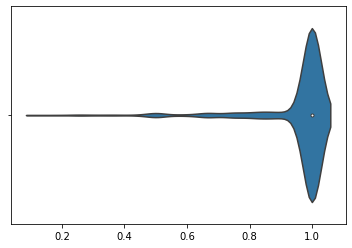

In [9]:
max_X = X.max()

sns.violinplot(max_X);

Distribution of Maximum is clearly peaked around 1, but some features have a much lower Maximum.

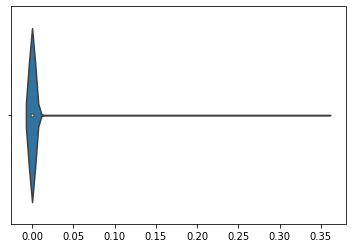

In [10]:
min_X = X.min()

sns.violinplot(min_X);

Distribution of Minimum is clearly peaked around 0, but some features have a much higher Minimum.

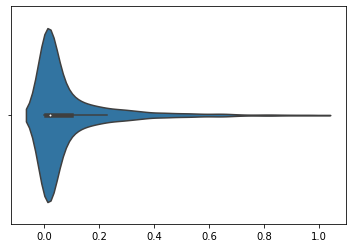

In [11]:
mean_X = X.mean()

sns.violinplot(mean_X);

Distribution  of Mean is peaked around 0, but the peak is larger than Distribution of Minimum. Some Features have much larger Mean.


Our visualization confirmed that all features were subjected to Normalization, i.e. "Min-Max Scaling", but they can still benefit from some sort of Scaling.


Are Minimum, Maximum and Mean equally distributed on both classes?

In [12]:
X_active = df.query(f"{target_name} == 1").drop(target_name, axis="columns")
X_inactive = df.query(f"{target_name} == 0").drop(target_name, axis="columns")

Amax


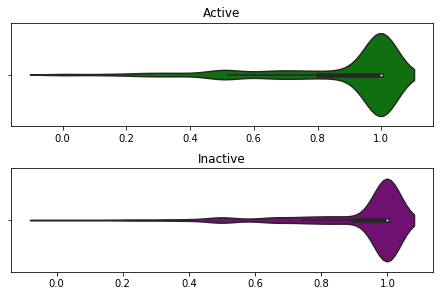


Amin


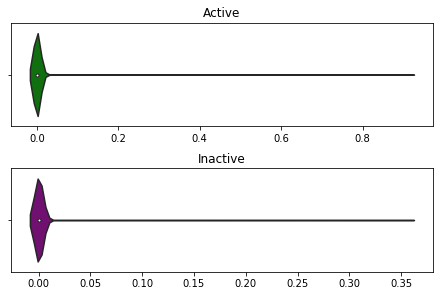


Mean


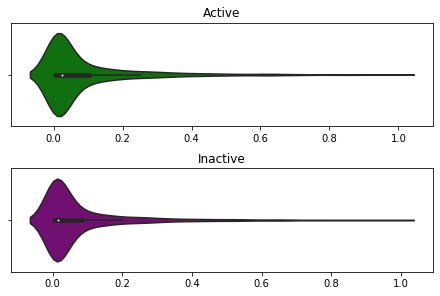

In [13]:
for statistic in [np.max, np.min, np.mean]:
    statistic_active = statistic(X_active)
    statistic_inactive = statistic(X_inactive)
    
    print(statistic.__name__.title())
    
    fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True)
    #fig.suptitle(statistic.__name__.title())
    
    ax1.set_title("Active")
    sns.violinplot(statistic_active, color="green", ax=ax1)
    
    ax2.set_title("Inactive")
    sns.violinplot(statistic_inactive, color="purple", ax=ax2)
    
    plt.show()
    print()

Minimum, Maximum and Mean of Descriptors are equally distributed between `Activity` classes.